## Notebook to examine differential expression in developing scRNAseq data

In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc

In [2]:
# Load in AnnData object
devData = sc.read("../Data/devData.h5ad")

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


/opt/conda/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


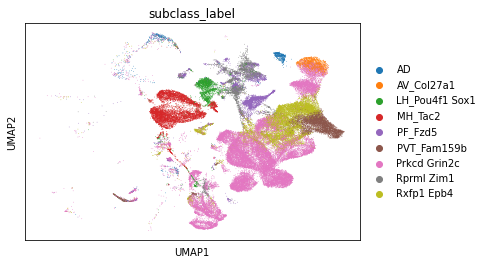

In [21]:
# Index by cell class
gluData = devData[devData.obs.class_label == "Glutamatergic"]
sc.pl.umap(gluData, color="subclass_label")

In [4]:
# Dispense the number of cells within each subclass
gluTypes = gluData.obs.subclass_label.unique()
pd.DataFrame([sum(gluData.obs.subclass_label == name) for name in gluTypes], index = gluTypes)

,0
MH_Tac2,6592
Rxfp1 Epb4,10468
Rprml Zim1,3605
Prkcd Grin2c,29016
PVT_Fam159b,5003
AD,861
LH_Pou4f1 Sox1,2224
PF_Fzd5,3704
AV_Col27a1,1335


In [5]:
# How many total clusters are there?
len(gluData.obs["cluster_label"].unique())

106

## Evaluate differentially expressed genes

In [23]:
# Remove clusters with fewer than 10 cells
gluTypes = gluData.obs.cluster_label.unique()
gluCounts = pd.DataFrame({'counts' : [sum(gluData.obs.cluster_label == name) for name in gluTypes]}, index = gluTypes)
gluRemove = gluCounts[gluCounts.counts < 10]
for cl in gluRemove.index:
    gluData = gluData[gluData.obs["cluster_label"] != cl]

In [ ]:
# Rank differentially expressed genes by comparing subclasses to all other subclass clusters
sc.tl.rank_genes_groups(gluData, 'cluster_label', method='wilcoxon',pts=True)